# AllLife Bank Personal Loan Campaign

## Context
AllLife Bank has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). 

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

You as a Data scientist at AllLife bank has to build a model that will help marketing department to identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

## Objective
* To predict weather a liability customer will buy personal loans.
* Which variables are most significant.
* Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Avg. spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by Bank?

## Loading libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I  print it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms

## Import Dataset

In [2]:
df = pd.read_csv("Loan_Modelling.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

np.random.seed(1)  # To get the same random results every time
df.sample(n=10)

There are 5000 rows and 14 columns.


ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
2764  2765   31           5      84    91320       1    2.9          3   
4767  4768   35           9      45    90639       3    0.9          1   
3814  3815   34           9      35    94304       3    1.3          1   
3499  3500   49          23     114    94550       1    0.3          1   
2735  2736   36          12      70    92131       3    2.6          2   
3922  3923   31           4      20    95616       4    1.5          2   
2701  2702   50          26      55    94305       1    1.6          2   
1179  1180   36          11      98    90291       3    1.2          3   
932    933   51          27     112    94720       3    1.8          2   
792    793   41          16      98    93117       1    4.0          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2764       105              0                   0           0       0   
4767       101              0                   1           0       0   
3814         0              0                   0           0       0   
3499       286              0                   0           0       1   
2735       165              0                   0           0       1   
3922         0              0                   0           0       1   
2701         0              0                   0           0       1   
1179         0              0                   1           0       0   
932          0              0                   1           1       1   
792          0              0                   0           0       0   

      CreditCard  
2764           1  
4767           0  
3814           0  
3499           0  
2735           0  
3922           0  
2701           0  
1179           1  
932            1  
792            1

### Let's explore data to get more insights

In [3]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

* The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.


In [4]:
df = df.drop(['ID'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


* No columns have null data in the file

In [6]:
df.describe().T

count          mean          std     min      25%  \
Age                 5000.0     45.338400    11.463166    23.0     35.0   
Experience          5000.0     20.104600    11.467954    -3.0     10.0   
Income              5000.0     73.774200    46.033729     8.0     39.0   
ZIPCode             5000.0  93152.503000  2121.852197  9307.0  91911.0   
Family              5000.0      2.396400     1.147663     1.0      1.0   
CCAvg               5000.0      1.937938     1.747659     0.0      0.7   
Education           5000.0      1.881000     0.839869     1.0      1.0   
Mortgage            5000.0     56.498800   101.713802     0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621     0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809     0.0      0.0   
CD_Account          5000.0      0.060400     0.238250     0.0      0.0   
Online              5000.0      0.596800     0.490589     0.0      0.0   
CreditCard          5000.0      0.294000     0.455637     0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

* The mean age of the customers is 45 with standard deviation of 11.5. 
* The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. 
* The mean annual income of the customer is 73.77 with standard deviation of 46. 
* The mean value of house mortgage is 56.5 with standard deviation of 101.71. 

In [7]:
df.Age.unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 61, 41, 28, 49, 47, 62,
       58, 54, 33, 27, 66, 24, 52, 26, 64, 63, 23], dtype=int64)

In [8]:
df.Income.unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218], dtype=int64)

In [9]:
df.Experience.unique() 

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [10]:
#We can see there are few negative values in experience which is practically not possible
# We assume that these negative signs here are by mistake, so we will replace them with positive signs
df.Experience.replace(-1,1,inplace=True)
df.Experience.replace(-2,2,inplace=True)
df.Experience.replace(-3,3,inplace=True)

In [11]:
df.Family.unique() 

array([4, 3, 1, 2], dtype=int64)

In [12]:
df.Securities_Account.unique() 

array([1, 0], dtype=int64)

In [13]:
df.CCAvg.unique() 

array([ 1.6 ,  1.5 ,  1.  ,  2.7 ,  0.4 ,  0.3 ,  0.6 ,  8.9 ,  2.4 ,
        0.1 ,  3.8 ,  2.5 ,  2.  ,  4.7 ,  8.1 ,  0.5 ,  0.9 ,  1.2 ,
        0.7 ,  3.9 ,  0.2 ,  2.2 ,  3.3 ,  1.8 ,  2.9 ,  1.4 ,  5.  ,
        2.3 ,  1.1 ,  5.7 ,  4.5 ,  2.1 ,  8.  ,  1.7 ,  0.  ,  2.8 ,
        3.5 ,  4.  ,  2.6 ,  1.3 ,  5.6 ,  5.2 ,  3.  ,  4.6 ,  3.6 ,
        7.2 ,  1.75,  7.4 ,  2.67,  7.5 ,  6.5 ,  7.8 ,  7.9 ,  4.1 ,
        1.9 ,  4.3 ,  6.8 ,  5.1 ,  3.1 ,  0.8 ,  3.7 ,  6.2 ,  0.75,
        2.33,  4.9 ,  0.67,  3.2 ,  5.5 ,  6.9 ,  4.33,  7.3 ,  4.2 ,
        4.4 ,  6.1 ,  6.33,  6.6 ,  5.3 ,  3.4 ,  7.  ,  6.3 ,  8.3 ,
        6.  ,  1.67,  8.6 ,  7.6 ,  6.4 , 10.  ,  5.9 ,  5.4 ,  8.8 ,
        1.33,  9.  ,  6.7 ,  4.25,  6.67,  5.8 ,  4.8 ,  3.25,  5.67,
        8.5 ,  4.75,  4.67,  3.67,  8.2 ,  3.33,  5.33,  9.3 ,  2.75])

In [14]:
df.Education.unique() 

array([1, 2, 3], dtype=int64)

In [15]:
df.Mortgage.unique() 

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

In [16]:
df.CD_Account.unique()

array([0, 1], dtype=int64)

In [17]:
df.Online.unique()

array([0, 1], dtype=int64)

In [18]:
df.CreditCard.unique()

array([0, 1], dtype=int64)

In [19]:
df.ZIPCode.unique()

array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

### Let's try to group them on the basis of first 2 digits

In [20]:
# The first digit indicates one of the regions and second digit indicates the sub region or one of the postal circles (States),
# So using first 2 digits will do work for our model
df['ZIPCode'] = df['ZIPCode'].astype(str)
print(df['ZIPCode'].str[0:2].nunique())
df['ZIPCode'] = df['ZIPCode'].str[0:2]

7


### Nothing unusual seen in the values of any of the variables

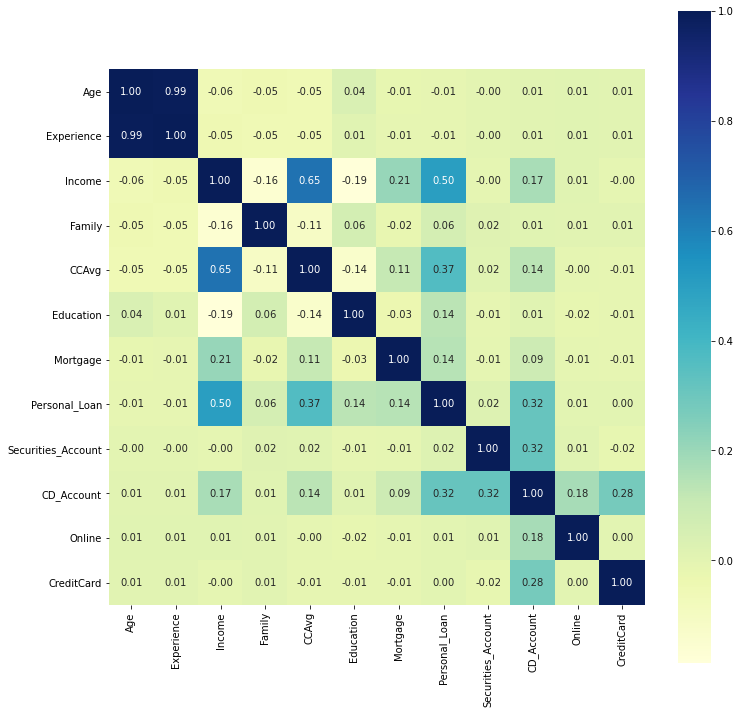

In [21]:
#Let's Look at correlation values
corr=df.corr()
fig,ax=plt.subplots(figsize=(12,12))
ax=sns.heatmap(corr,annot=True,square=True,fmt=".2f",cmap="YlGnBu")

* Age and Experience seems to highly correlated and that is very obvious too, as age increases, experience also increases
* Age, Experience, Online and credit card seems to be very less correlated with Personal loan
* Income and CCAvg seems to be correlated and that's obvious too, a person with higher salary will spend more on an average

### Let's Look at outliers in each column

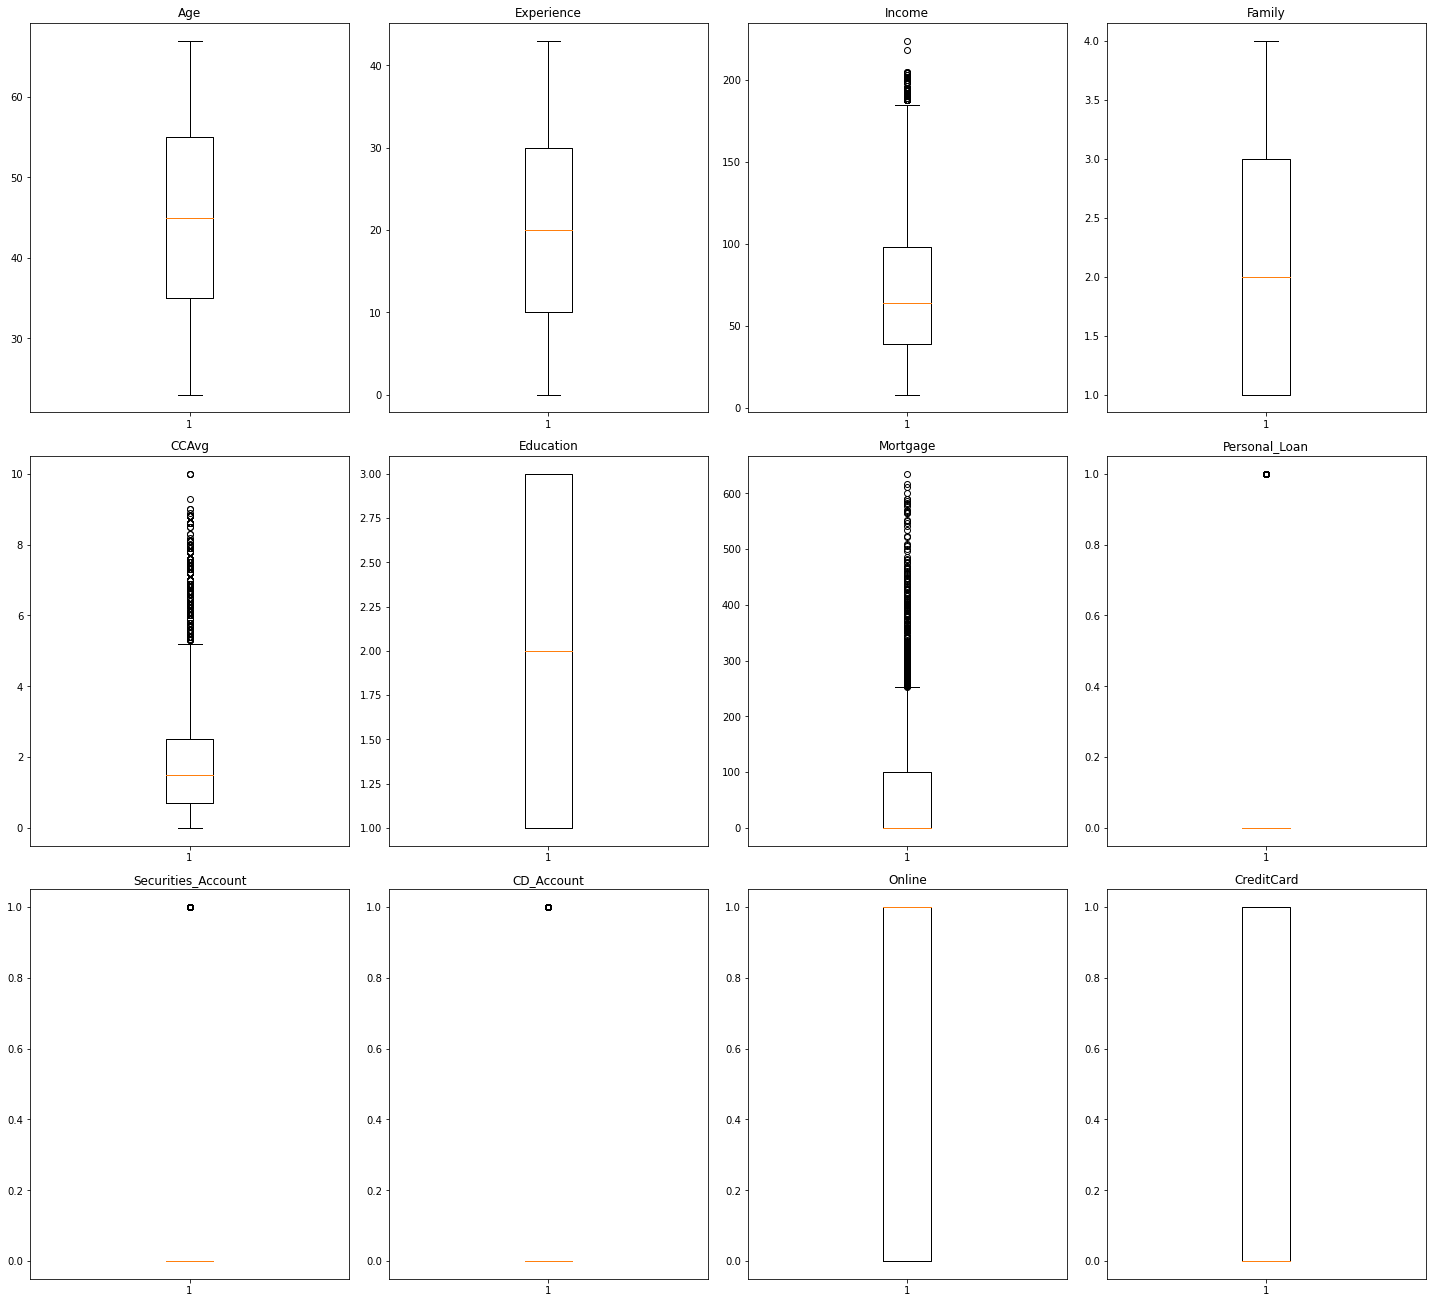

In [22]:
# outlier detection using boxplot
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,30))

for i, variable in enumerate(numerical_col):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

We can see that Income, CCavg, Mortgage, Personal_loan, Securities_Account, CD_Account shows outliers, but they actually are not outliers - these are the variables that not every person has some value in. so there is nothing wrong in having such values

## EDA

### Let's look at details of dataset using pandas_profiling 

In [23]:
# pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling
df.profile_report()

## Observations
* The data set got 0 missing cells.
* It got 7 numeric variables: ‘Age’, ‘CC_Avg’, ‘ID’, ‘Income’, ‘Mortgage’, ‘Zip_Code’, ‘Experience’
* It got 2 categorical variables: ‘Education’, ‘Family’
* It got 5 Boolean variables: ‘CD_Account’, ‘Credit_Card’, ‘Online’, ‘Personal_Loan’, ‘Securities Account’
* Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (CD) account with the bank.
* Also, Experience is highly correlated with Age (ρ = 0.994214857)

### Categorical
* 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.
* Around 29% of the customer’s family size is 1.

### Boolean
* 94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.
* Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
* Around 60% of customers use internet banking facilities.
* Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
* Around 90% of the customer doesn’t have a securities account with the bank.

### Numeric
* The mean age of the customers is 45 with standard deviation of 11.5. Also, we had estimated the average age in hypothesis testing between 30–50. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical
* The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337)
* The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)
* The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)

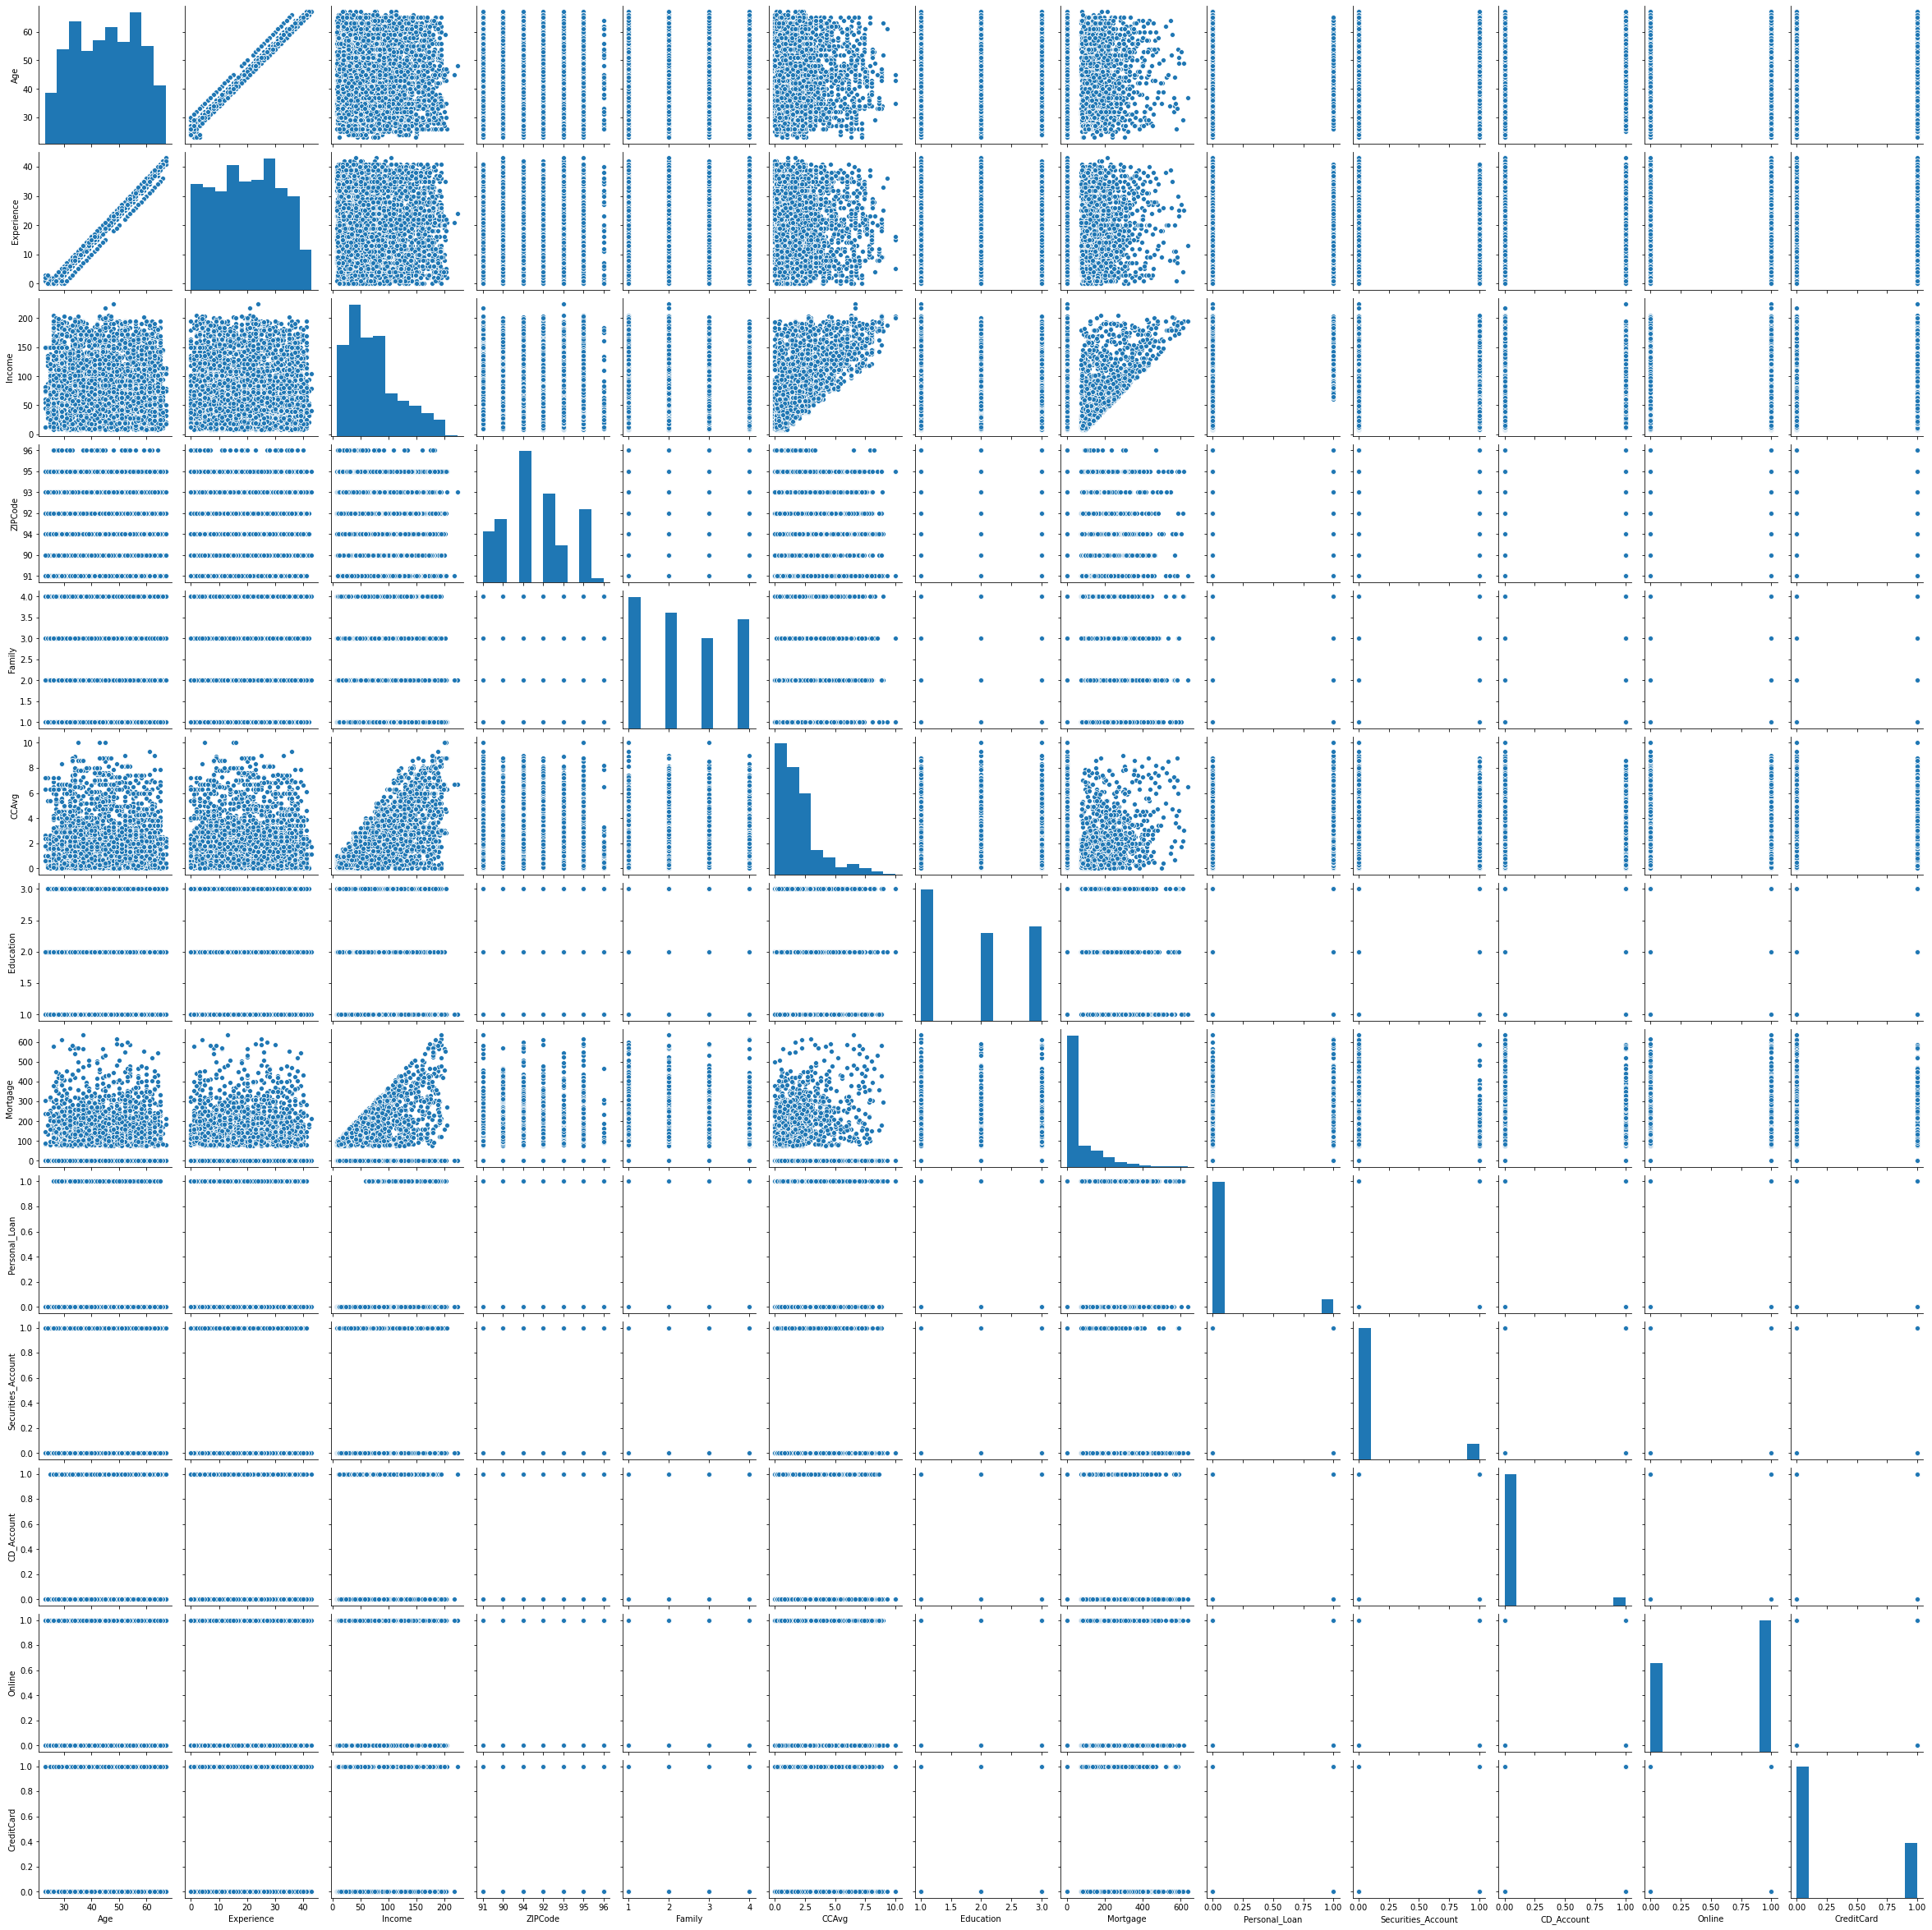

In [24]:
sns.pairplot(df)

* Income is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median.
* CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K
* Experience is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. 
* The variables family and education are ordinal variables. The distribution of families is evenly distributes

In [25]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()
    

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


<Figure size 648x648 with 0 Axes>

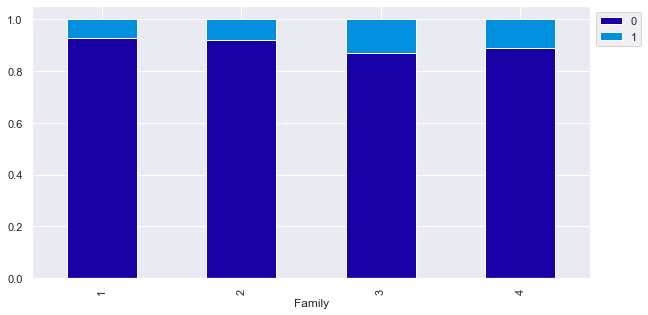

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


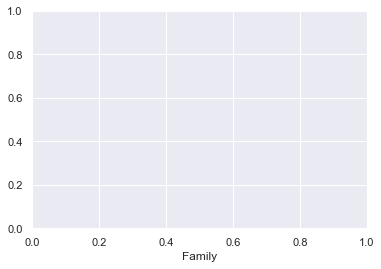

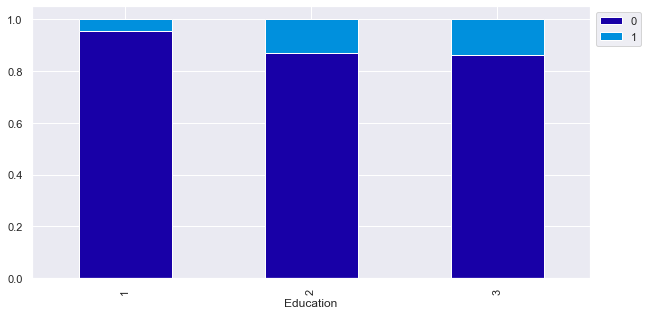

Personal_Loan     0    1   All
Personal_Loan                 
0              4520    0  4520
1                 0  480   480
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


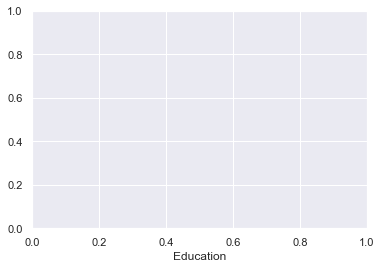

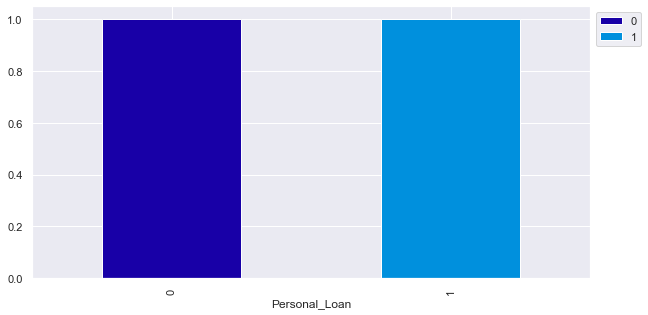

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


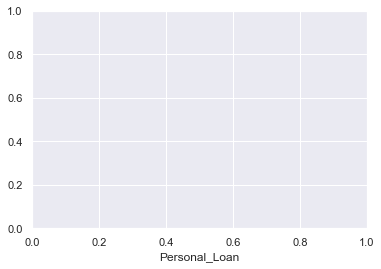

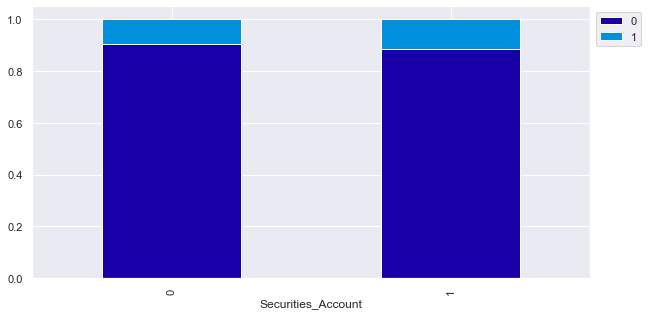

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


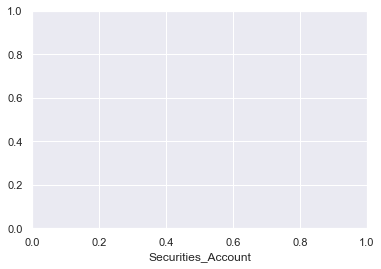

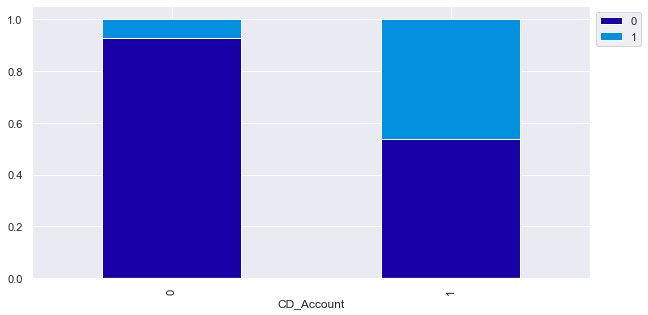

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


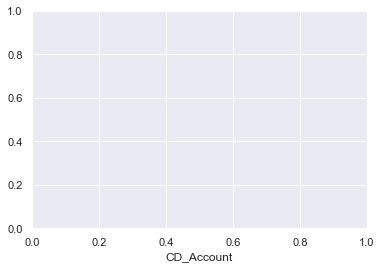

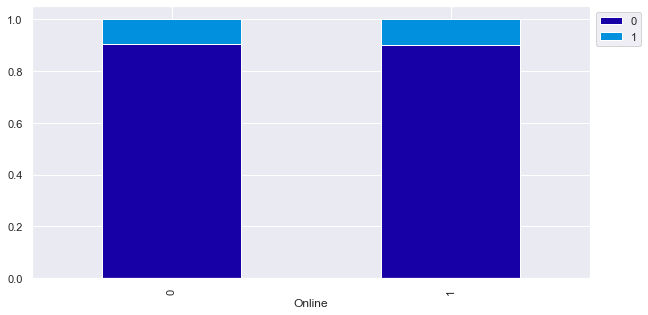

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


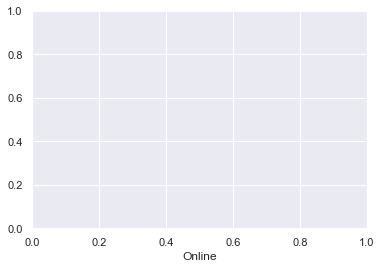

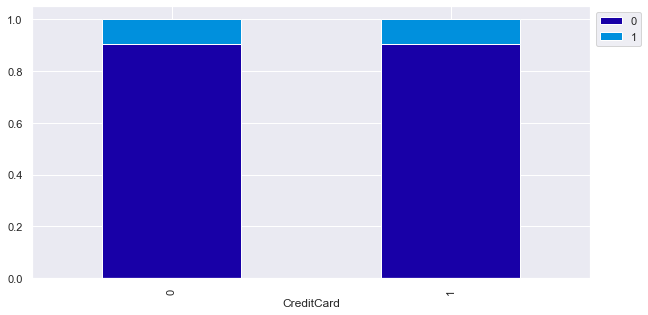

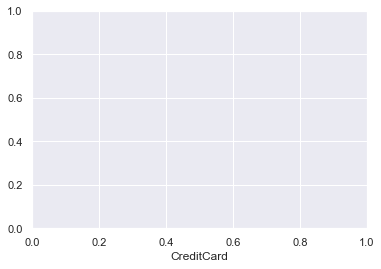

In [26]:
categorical_val = ['Family','Education','Personal_Loan','Securities_Account','CD_Account','Online','CreditCard']

plt.figure(figsize=(9,9))
for i , column in enumerate(categorical_val,1):
    stacked_plot(df[column])
    plt.xlabel(column)

### Influence of income and education on personal loan

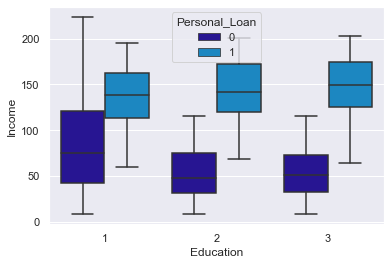

In [27]:
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=df)

*  It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

### Influence of Securities_account on Personal loan

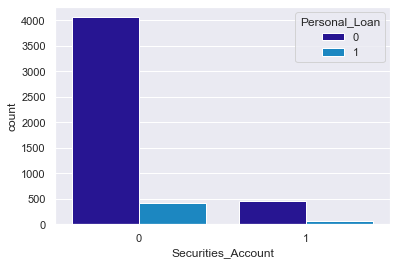

In [28]:
sns.countplot(x="Securities_Account", data=df,hue="Personal_Loan")

* Majority of customers who does not have loan have securities account, this might be happening because majority of people don't have loan.

### Influence of Family size on Personal loan

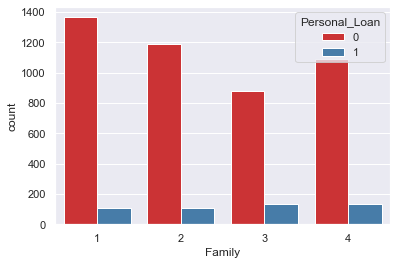

In [29]:
sns.countplot(x='Family',data=df,hue='Personal_Loan',palette='Set1')

* Family size does not have any impact in personal loan. But it seems families with size of 3 and 4 are more likely to take loan. When considering future campaign this might be good association.

### Influence of CDAccount on Personal loan

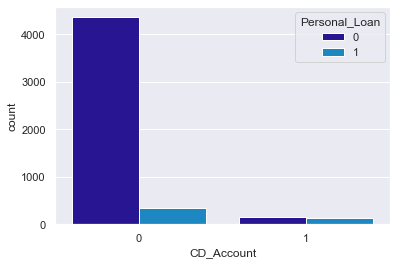

In [30]:
sns.countplot(x='CD_Account',data=df,hue='Personal_Loan')

* Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

### Influence of Age on Personal loan

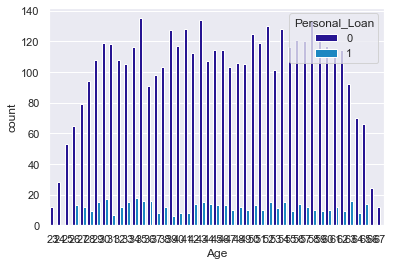

In [31]:
sns.countplot(x='Age',data=df,hue='Personal_Loan')

* Age doesn't have impact on Personal Loan

### Model Evaluation Criteria

In [32]:
print('No. of 0s' , (df.Personal_Loan == 0).sum(axis=0))
print('No. of 1s' , (df.Personal_Loan == 1).sum(axis=0))

No. of 0s 4520
No. of 1s 480


### Here bank can face 2 types of losses
 1. False negative - Person would take a loan but model says - he won't - Loss of opportunity
 2. False positive - Model says person will take a loan, but in actual person won't - Increased Marketing cost

### Which loss is bigger?
 - False negatives i.e. Loss of Oppurtunity (Typically marketing cost is small)
 - So we want to reduce False negatives and for that we have to maximize the Recall while keeping Accuracy in balance

### Split the data

In [33]:
## Defining X and Y variables
# Here we had 6 categorical variables but 4 of them are binary, so we'll have same results with them even after creating dummies
# education and family have order within them, so we won't convert them to dummies
# so let's not change them and make dummies only for Zipcode

df["ZIPCode"] = df["ZIPCode"].astype('category')

X = df.drop(['Personal_Loan'], axis=1)
Y = df[['Personal_Loan']] 

X = pd.get_dummies(X, drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30)

In [104]:
print('Original dataset', Y.Personal_Loan.value_counts(normalize=True))
print('Train dataset', y_train.Personal_Loan.value_counts(normalize=True))
print('Test dataset', y_test.Personal_Loan.value_counts(normalize=True))

Original dataset 0    0.904
1    0.096
Name: Personal_Loan, dtype: float64
Train dataset 0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Test dataset 0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


* Data split looks uniform

In [35]:
X.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0   25           1      49       4    1.6          1         0   
1   45          19      34       3    1.5          1         0   
2   39          15      11       1    1.0          1         0   
3   35           9     100       1    2.7          2         0   
4   35           8      45       4    1.0          2         0   

   Securities_Account  CD_Account  Online  CreditCard  ZIPCode_91  ZIPCode_92  \
0                   1           0       0           0           1           0   
1                   1           0       0           0           0           0   
2                   0           0       0           0           0           0   
3                   0           0       0           0           0           0   
4                   0           0       0           1           1           0   

   ZIPCode_93  ZIPCode_94  ZIPCode_95  ZIPCode_96  
0           0           0           0           0  
1           0           0           0           0  
2           0           1           0           0  
3           0           1           0           0  
4           0           0           0           0

In [36]:
## Defining a function for better visualization of confusion matrix

from sklearn.metrics import classification_report,confusion_matrix
#mat_train = confusion_matrix(y_train,pred_train)


def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# Logistic Regression

### Let's build model using Statsmodels

### Before making the model, first let's check if our variables has multicollinearity

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [37]:
# dataframe with numerical column only
num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 438.228111
Age                    89.489702
Experience             89.389767
Income                  1.860653
Family                  1.034829
CCAvg                   1.728453
Education               1.109276
Mortgage                1.052088
Securities_Account      1.137130
CD_Account              1.330671
Online                  1.040537
CreditCard              1.108600
ZIPCode_91              1.601704
ZIPCode_92              1.932491
ZIPCode_93              1.462991
ZIPCode_94              2.188173
ZIPCode_95              1.812584
ZIPCode_96              1.050528
dtype: float64



* Age and Experience seems to be highly correlated, so we will drop one of them depending on which has less effect on making predictions

In [39]:
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, Y, test_size=0.30)

In [40]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.120754
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3482
Method:                           MLE   Df Model:                           17
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                  0.6189
Time:                        09:43:39   Log-Likelihood:                -422.64
converged:                       True   LL-Null:                       -1109.0
Covariance Type:            nonrobust   LLR p-value:                1.172e-281
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.3621      1.949     -6.855      0.000     -17.183      -9.541
Age  

In [41]:
X_train1 = X_train.drop('Age', axis = 1)
X_test1 = X_test.drop('Age', axis = 1)

logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.120771
         Iterations 9


In [42]:
# Let's check accuracy and recall for this model

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

pred_train1 = lg1.predict(X_train1)
pred_test1 = lg1.predict(X_test1)

pred_train1 = np.round(pred_train1)
pred_test1 = np.round(pred_test1)

print('Accuracy on train data:',accuracy_score(y_train, pred_train1) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test1))

print('Recall on train data:',recall_score(y_train, pred_train1) )
print('Recall on test data:',recall_score(y_test, pred_test1))

print('Precision on train data:',precision_score(y_train, pred_train1) )
print('Precision on test data:',precision_score(y_test, pred_test1))

print('f1 score on train data:',f1_score(y_train, pred_train1) )
print('f1 score on test data:',f1_score(y_test, pred_test1))

Accuracy on train data: 0.9548571428571428
Accuracy on test data: 0.94
Recall on train data: 0.6735905044510386
Recall on test data: 0.5874125874125874
Precision on train data: 0.8254545454545454
Precision on test data: 0.7304347826086957
f1 score on train data: 0.7418300653594772
f1 score on test data: 0.6511627906976745


In [43]:
X_train2 = X_train.drop('Experience', axis = 1)
X_test2 = X_test.drop('Experience', axis = 1)

logit2 = sm.Logit(y_train, X_train2)
lg2 = logit2.fit()


Optimization terminated successfully.
         Current function value: 0.120792
         Iterations 9


In [44]:
# Let's check accuracy and recall for this model

pred_train2 = lg2.predict(X_train2)
pred_test2 = lg2.predict(X_test2)

pred_train2 = np.round(pred_train2)
pred_test2 = np.round(pred_test2)

print('Accuracy on train data:',accuracy_score(y_train, pred_train2) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test2))

print('Recall on train data:',recall_score(y_train, pred_train2) )
print('Recall on test data:',recall_score(y_test, pred_test2))

print('Precision on train data:',precision_score(y_train, pred_train2) )
print('Precision on test data:',precision_score(y_test, pred_test2))

print('f1 score on train data:',f1_score(y_train, pred_train2) )
print('f1 score on test data:',f1_score(y_test, pred_test2))

Accuracy on train data: 0.9548571428571428
Accuracy on test data: 0.94
Recall on train data: 0.6735905044510386
Recall on test data: 0.5874125874125874
Precision on train data: 0.8254545454545454
Precision on test data: 0.7304347826086957
f1 score on train data: 0.7418300653594772
f1 score on test data: 0.6511627906976745


* The accuracy on lg1 and lg2 is same
* But let's proceed with lg1 i.e. we should drop age variable and keep Experience variable

### Let's check VIF score again

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_feature_set = num_feature_set.drop(['Age'], axis = 1)
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                 28.088910
Experience             1.008621
Income                 1.856538
Family                 1.034029
CCAvg                  1.725196
Education              1.044226
Mortgage               1.052074
Securities_Account     1.136958
CD_Account             1.330221
Online                 1.040507
CreditCard             1.108596
ZIPCode_91             1.601638
ZIPCode_92             1.932212
ZIPCode_93             1.462989
ZIPCode_94             2.188151
ZIPCode_95             1.812569
ZIPCode_96             1.050328
dtype: float64



### Now none of the variables have high VIF score

Let's Look at summary of lg1 and make interpretations

In [46]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           16
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                  0.6188
Time:                        09:43:39   Log-Likelihood:                -422.70
converged:                       True   LL-Null:                       -1109.0
Covariance Type:            nonrobust   LLR p-value:                1.316e-282
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.9626      0.776    -17.994      0.000     -15.483     -12.442
Experience             0.0123      0.008      1.534      0.125      -0.003       0.028
Income              

* Observe that p value of Experience, Securities_Account and all 6 classes of ZIP code is greater than 0.05, they seem to be insignificant
* Let's Drop them one by one and observe how our model changes
* This is something we observed during EDA also, Experience and Securities_Account didn't showed any specific pattern with personal loan

In [47]:
X_train3 = X_train1.drop(['ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96'], axis = 1)
X_test3 = X_test1.drop(['ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96'], axis = 1)


logit3 = sm.Logit(y_train, X_train3)
lg3 = logit3.fit()

# Let's check accuracy and recall for this model
pred_train3 = lg3.predict(X_train3)
pred_test3 = lg3.predict(X_test3)

pred_train3 = np.round(pred_train3)
pred_test3 = np.round(pred_test3)

print('Accuracy on train data:',accuracy_score(y_train, pred_train3) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test3))

print('Recall on train data:',recall_score(y_train, pred_train3) )
print('Recall on test data:',recall_score(y_test, pred_test3))

print('Precision on train data:',precision_score(y_train, pred_train3) )
print('Precision on test data:',precision_score(y_test, pred_test3))

print('f1 score on train data:',f1_score(y_train, pred_train3) )
print('f1 score on test data:',f1_score(y_test, pred_test3))

print(lg3.summary())

Optimization terminated successfully.
         Current function value: 0.121586
         Iterations 9
Accuracy on train data: 0.9571428571428572
Accuracy on test data: 0.9426666666666667
Recall on train data: 0.6795252225519288
Recall on test data: 0.5874125874125874
Precision on train data: 0.8450184501845018
Precision on test data: 0.7567567567567568
f1 score on train data: 0.7532894736842106
f1 score on test data: 0.6614173228346457
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                           10
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                  0.6163
Time:                        09:43:39   Log-Likelihood:                -425.55
converged:                       True   LL-Null:                       -1109.0
Covaria

* Accuarcy increased from .954 to .957
* Now let's drop Experience

In [48]:
X_train4 = X_train3.drop(['Experience'], axis = 1)
X_test4 = X_test3.drop(['Experience'], axis = 1)


logit4 = sm.Logit(y_train, X_train4)
lg4 = logit4.fit()

# Let's check accuracy and recall for this model
pred_train4 = lg4.predict(X_train4)
pred_test4 = lg4.predict(X_test4)

pred_train4 = np.round(pred_train4)
pred_test4 = np.round(pred_test4)

print('Accuracy on train data:',accuracy_score(y_train, pred_train4) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test4))

print('Recall on train data:',recall_score(y_train, pred_train4) )
print('Recall on test data:',recall_score(y_test, pred_test4))

print('Precision on train data:',precision_score(y_train, pred_train4) )
print('Precision on test data:',precision_score(y_test, pred_test4))

print('f1 score on train data:',f1_score(y_train, pred_train4))
print('f1 score on test data:',f1_score(y_test, pred_test4))

print(lg4.summary())

Optimization terminated successfully.
         Current function value: 0.121934
         Iterations 9
Accuracy on train data: 0.956
Accuracy on test data: 0.9426666666666667
Recall on train data: 0.6676557863501483
Recall on test data: 0.5944055944055944
Precision on train data: 0.8426966292134831
Precision on test data: 0.7522123893805309
f1 score on train data: 0.7450331125827814
f1 score on test data: 0.6640625
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3490
Method:                           MLE   Df Model:                            9
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                  0.6152
Time:                        09:43:39   Log-Likelihood:                -426.77
converged:                       True   LL-Null:                       -1109.0
Covariance Type:            n

* No change in Accuracy, only the Recall on test data deceased from .67 to .66
* Now let's drop Securities_Account

In [49]:
X_train5 = X_train4.drop(['Securities_Account'], axis = 1)
X_test5 = X_test4.drop(['Securities_Account'], axis = 1)


logit5 = sm.Logit(y_train, X_train5)
lg5 = logit5.fit()

# Let's check accuracy and precision for this model
pred_train5 = lg5.predict(X_train5)
pred_test5 = lg5.predict(X_test5)

pred_train5 = np.round(pred_train5)
pred_test5 = np.round(pred_test5)

print('Accuracy on train data:',accuracy_score(y_train, pred_train5) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test5))

print('Recall on train data:',recall_score(y_train, pred_train5) )
print('Recall on test data:',recall_score(y_test, pred_test5))

print('Precision on train data:',precision_score(y_train, pred_train5) )
print('Precision on test data:',precision_score(y_test, pred_test5))

print('f1 score on train data:',f1_score(y_train, pred_train5))
print('f1 score on test data:',f1_score(y_test, pred_test5))

print(lg5.summary())

Optimization terminated successfully.
         Current function value: 0.122747
         Iterations 9
Accuracy on train data: 0.9551428571428572
Accuracy on test data: 0.942
Recall on train data: 0.6617210682492581
Recall on test data: 0.5944055944055944
Precision on train data: 0.8383458646616542
Precision on test data: 0.7456140350877193
f1 score on train data: 0.7396351575456053
f1 score on test data: 0.6614785992217898
                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Mon, 07 Dec 2020   Pseudo R-squ.:                  0.6126
Time:                        09:43:39   Log-Likelihood:                -429.62
converged:                       True   LL-Null:                       -1109.0
Covariance Type:    

* Accuracy and Recall are appoximately same
* The difference isn't much, so we can say that lg5 is best model for making inference

* Coefficient of Income, Family, CCAvg, Education,Mortgage and CD_Account are positive, increase in these will lead to increase in chances of taking persoanl loan 
* Coefficient of Online and CreditCard is negative, increase in these will lead to decrease in chances of taking personal loan
* 1 unit change in CCAvg will change the odds of taking a loan by : 15.77%
* similarly 1 unit change in Income will change the odds of taking loan by : 5.77%
* Family and Education and CD_Account have greater coefficients, so small changes in there value will have bigger change in chances of taking personal loan

* Please note that when coefficient is b , than change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)

* It seems like recall score can be impoved further, so let's try to change the model threshold using AUC-ROC Curve
* There are no signs of Overfitting
* At some place we see that metric is perfoming better on test set, that totally depends on data distribution - if we change the random state then this would change too

### We can see that Recall can be improved further, let's try to do that using optimal threshold

### Optimal threshold using AUC-ROC curve

In [50]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg5.predict(X_test5))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.08015456697850999


In [51]:
# Model prediction with optimal threshold
pred_train_opt = (lg5.predict(X_train5)>optimal_threshold).astype(int)
pred_test_opt = (lg5.predict(X_test5)>optimal_threshold).astype(int)

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.8854285714285715
Accuracy on test data: 0.886
Recall on train data: 0.913946587537092
Recall on test data: 0.8741258741258742
Precision on train data: 0.45294117647058824
Precision on test data: 0.44964028776978415
f1 score on train data: 0.6057030481809244
f1 score on test data: 0.5938242280285037


### Using AUC-ROC curve to get optimal threshold
* Accuracy decreased from .95 to .88
* Recall increased from .66 to .91

### As we will decrease the threshold value, Precision will go on increasing, but that's not what is needed because that will lead to high marketing cost, we need to choose optimal balance between recall and accuracy

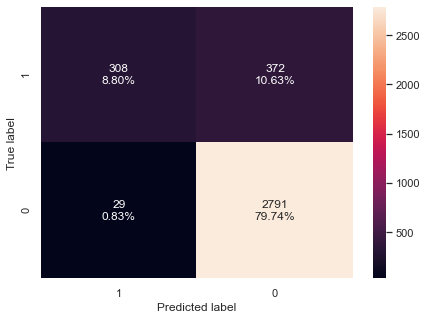

In [52]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train_opt)

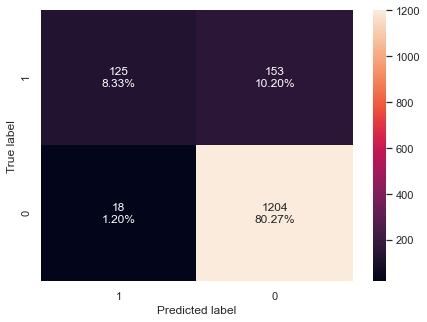

In [53]:
# let us make confusion matrix on test set
make_confusion_matrix(y_test,pred_test_opt)

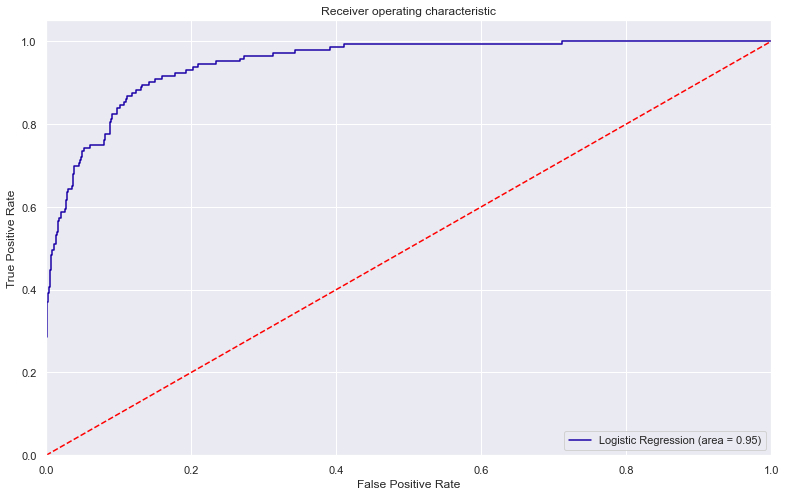

In [54]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lg.predict(X_test))
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

* Area under the curve is 0.95
* Recall is .91 on train and .87 on test that is quite good

# Decision Trees

## Split data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.30, random_state=1)

## Build Decision Tree Model

We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option include 'entropy'.  

In [56]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [57]:
prob_train = dTree.predict_proba(X_train)
pred_train = dTree.predict(X_train)

prob_test = dTree.predict_proba(X_test)
pred_test = dTree.predict(X_test)

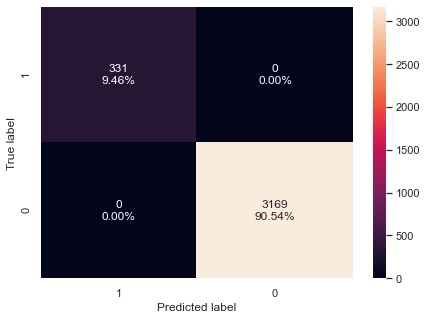

In [58]:
# let us make confusion matrix on train set
make_confusion_matrix(y_train,pred_train)

* 0 errors on train data, each sample has been classified correctly

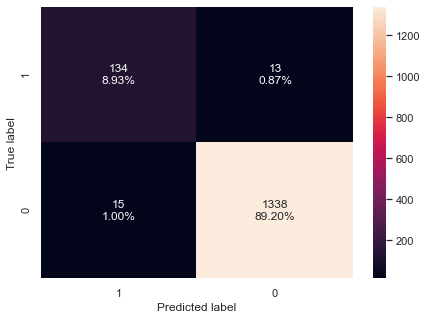

In [59]:
# let us make confusion matrix on test set
make_confusion_matrix(y_test,pred_test)

In [60]:
print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train) )
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 1.0
Accuracy on test data: 0.9813333333333333
Recall on train data: 1.0
Recall on test data: 0.8993288590604027
Precision on train data: 1.0
Precision on test data: 0.9115646258503401
f1 score on train data: 1.0
f1 score on test data: 0.9054054054054055


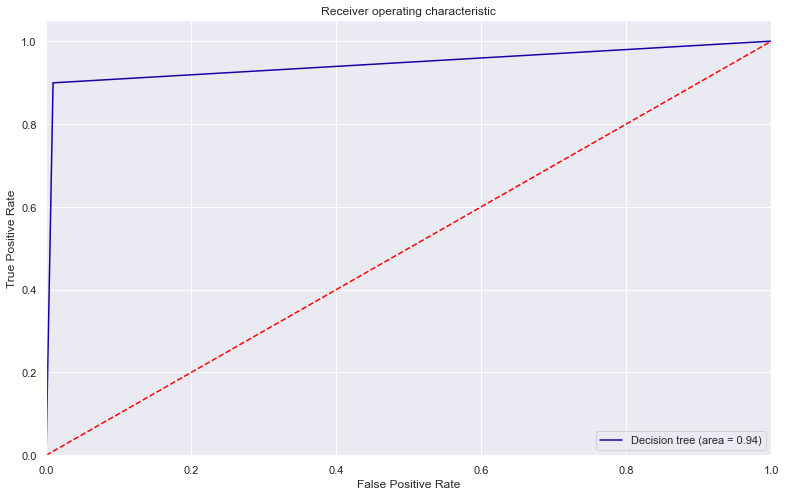

In [61]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, dTree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dTree.predict_proba(X_test)[:,1])
plt.figure(figsize=(13,8))
plt.plot(fpr, tpr, label='Decision tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

* Overall the output looks good and shows no sign of overfitting in accuracy but if we look at recall, on train set it's 1 while on test it is .89, so we'll use pruning and try to reduce this difference
* Area under the curve is also 0.94 that is quite good

## Visualizing the Decision Tree

In [62]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96']


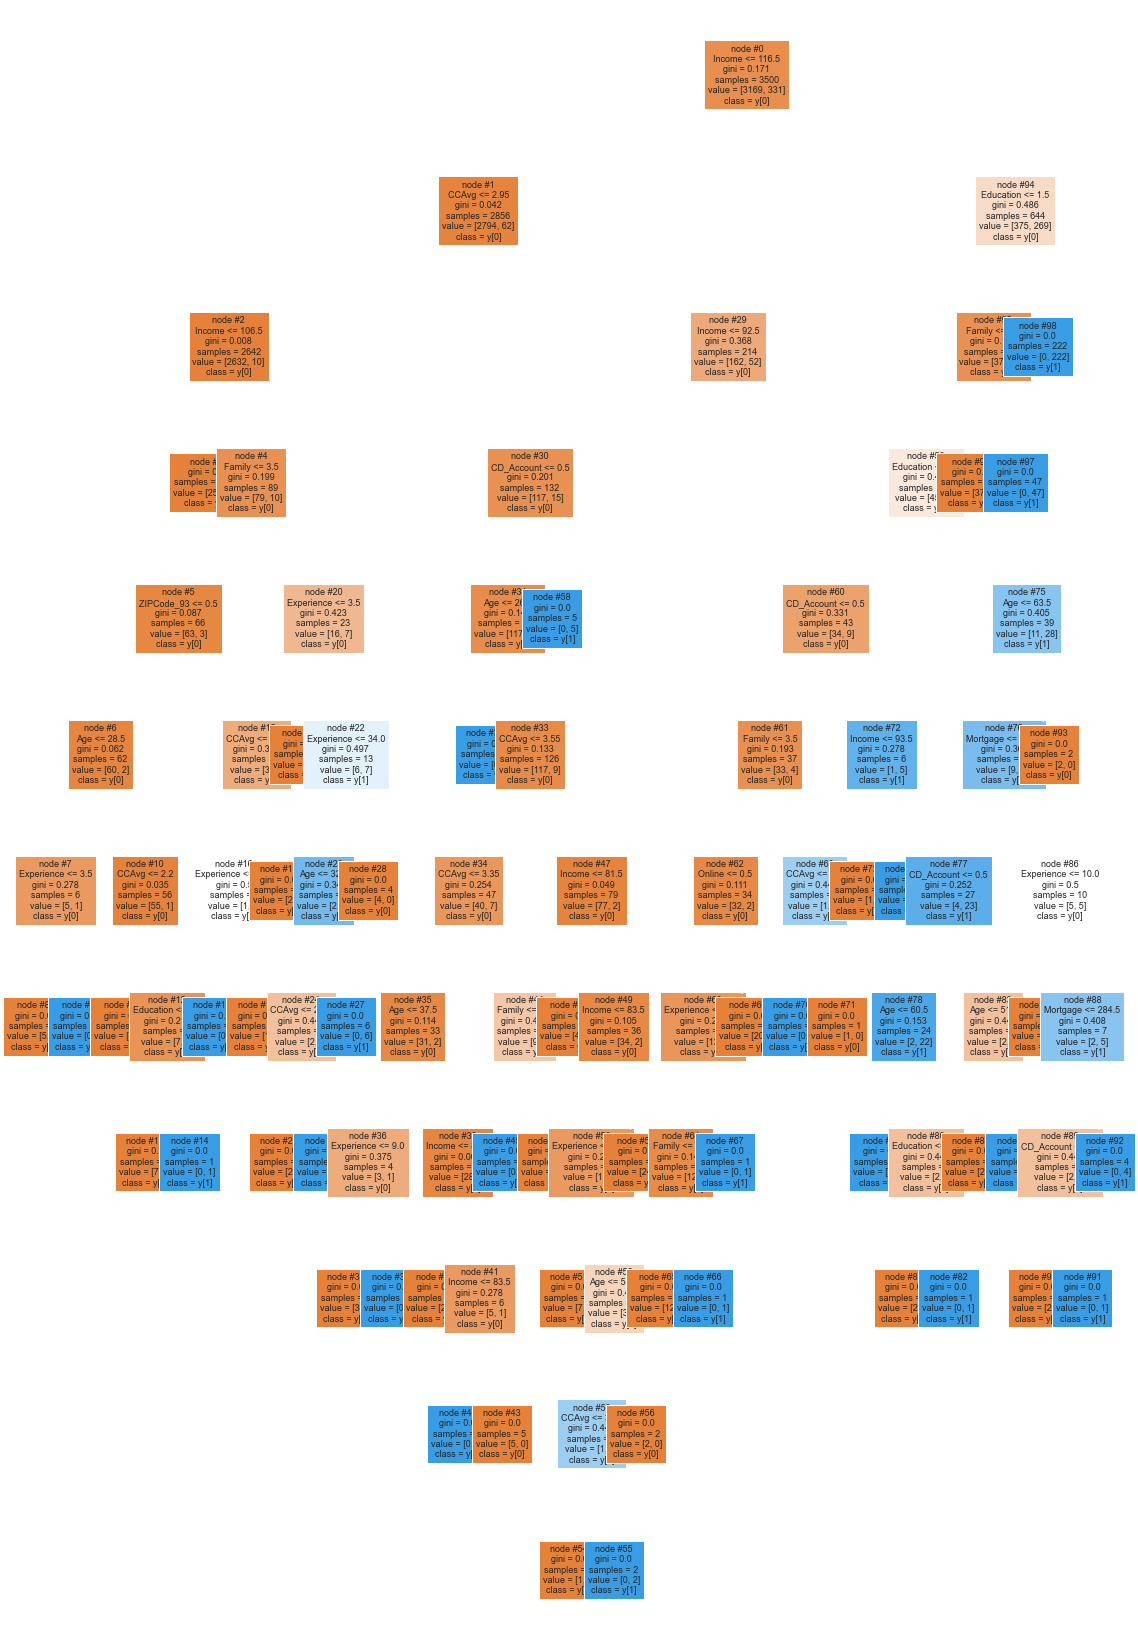

In [63]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [64]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.406096
Income              0.304761
Family              0.160377
CCAvg               0.050048
CD_Account          0.027936
Experience          0.025782
Age                 0.018288
Mortgage            0.005557
ZIPCode_93          0.000594
Online              0.000561
Securities_Account  0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000


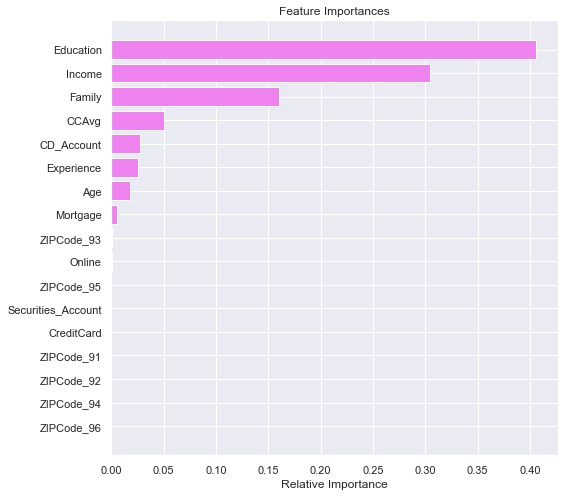

In [65]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [66]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- CCAvg <= 1.95
|   

### Observations

* Online,CreditCard, Securities_Account, ZIPCode have 0 importance, Education is most important followed by Income and Family size
* People with Income less than 116.5 , CCAvg less than 2.95 and Income less than 106.5(1000dollars), have less chances of buying loan
* But people having income more than 106.5, Family not of size 4, age less than 28.50 and Experience greater than 3.50 have more chances of taking a loan
* People with Income greater than 116.5, did only undergraduation, have family size less than 2 have less chances of buying a loan while People with family size greater than 2, and education level more than undergraduate has more chances of buying a loan
     
     
* So bank should campaign more on people with higher income, More education and larger family sizes

## Reducing over fitting (Regularization)

* In general, the deeper you allow your tree to grow, the more complex your model will become because you will have more splits
  and it captures more information about the data and this is one of the root causes of overfitting

### Let's try Grid search
* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in then
hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Gridsearch
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [67]:
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(6,15), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=1)

In [68]:
prob_train = estimator.predict_proba(X_train)
pred_train = estimator.predict(X_train)

prob_test = estimator.predict_proba(X_test)
pred_test = estimator.predict(X_test)

In [69]:

print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train) )
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.9902857142857143
Accuracy on test data: 0.98
Recall on train data: 0.9274924471299094
Recall on test data: 0.8657718120805369
Precision on train data: 0.9684542586750788
Precision on test data: 0.9280575539568345
f1 score on train data: 0.947530864197531
f1 score on test data: 0.8958333333333333


* This doesn't seem to provide good outputs, recall decreased for both train and test data

## Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

In [70]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [71]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000214    0.000429
2     0.000223    0.001542
3     0.000242    0.002750
4     0.000268    0.003824
5     0.000359    0.004900
6     0.000381    0.005280
7     0.000381    0.005661
8     0.000381    0.006042
9     0.000381    0.006423
10    0.000381    0.006804
11    0.000435    0.007240
12    0.000476    0.007716
13    0.000508    0.008224
14    0.000578    0.010537
15    0.000582    0.011119
16    0.000621    0.011740
17    0.000769    0.014817
18    0.000792    0.017985
19    0.001552    0.019536
20    0.002333    0.021869
21    0.003024    0.024893
22    0.003294    0.028187
23    0.006473    0.034659
24    0.023866    0.058525
25    0.056365    0.171255

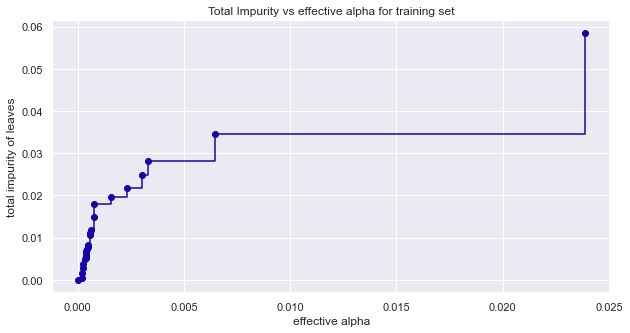

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [73]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

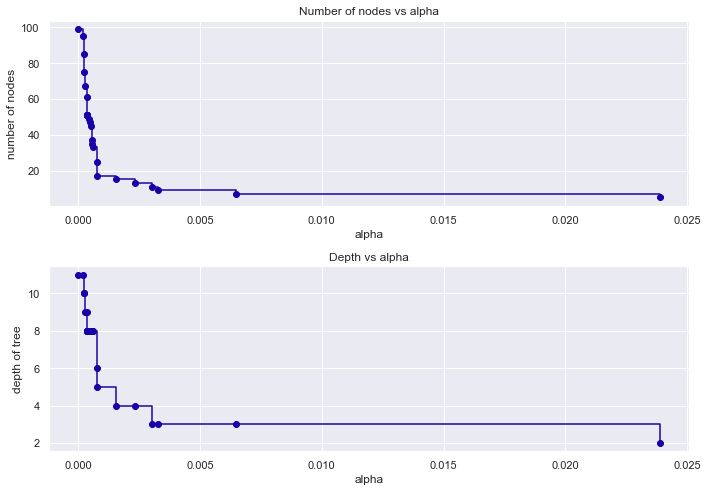

In [74]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------
When ``ccp_alpha`` is set to zero and keeping the other default parameters
of `DecisionTreeClassifier`, the tree overfits, leading to
a 100% training Recall and 90% testing Recall. As alpha increases, more
of the tree is pruned, thus creating a decision tree that generalizes better.

In [75]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)
    
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

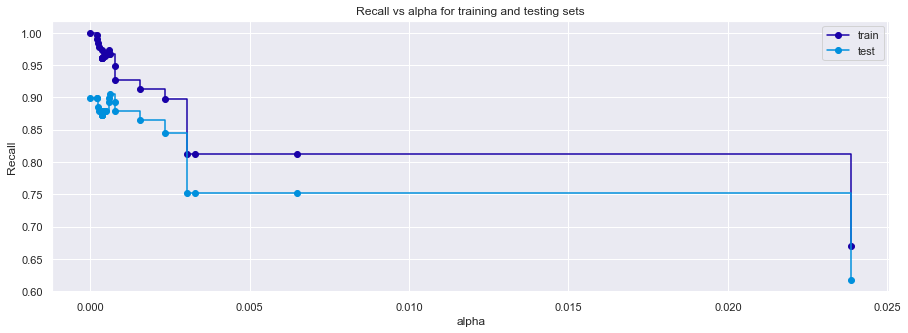

In [76]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [77]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


In [78]:
prob_train = best_model.predict_proba(X_train)
pred_train = best_model.predict(X_train)

prob_test = best_model.predict_proba(X_test)
pred_test = best_model.predict(X_test)


print('Accuracy on train data:',accuracy_score(y_train, pred_train) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test))

print('Recall on train data:',recall_score(y_train, pred_train) )
print('Recall on test data:',recall_score(y_test, pred_test))

print('Precision on train data:',precision_score(y_train, pred_train) )
print('Precision on test data:',precision_score(y_test, pred_test))

print('f1 score on train data:',f1_score(y_train, pred_train) )
print('f1 score on test data:',f1_score(y_test, pred_test))

Accuracy on train data: 0.9928571428571429
Accuracy on test data: 0.984
Recall on train data: 0.9667673716012085
Recall on test data: 0.9060402684563759
Precision on train data: 0.9580838323353293
Precision on test data: 0.9310344827586207
f1 score on train data: 0.962406015037594
f1 score on test data: 0.9183673469387755


* Post pruning using ccp alpha seems to have reduced difference between train and test performances but only by reducing model performance on train set, so let's proceed with the basic model we made earlier

### Compare outputs from Logistic regression and Decision tree
* Overall we can see that Decision tree performs better on given dataset
* Looking at important variables on the basis of pvalues in Logistic regression and Feature importance in Decision trees
    * Income, CCAvg, CD_Account, Family, Education, Mortgage are important in Both
    * And looking at their coefficients from logistic Regression shows that increase in these variables leads to increase in chances of buying loan
    
### Recommendation
**Bank should spend more on campaigning for people with income more than 116(thousand dollars), More education(graduate/professional), family size of 3 or more and Mortgage values of greater than 284**

In [105]:
Measures = {'Logistic Regression': [0.95, 0.94, 0.66, 0.59, 0.83, 0.74, 0.73, 0.66],
        'LR with opt threshold': [0.88, 0.88, 0.91, 0.87, 0.45, 0.44, 0.60, 0.59],
        'Decision Tree': [1, 0.98, 1, 0.89, 1, 0.91, 1, 0.90]
        }

df = pd.DataFrame(Measures, columns = ['Logistic Regression','LR with opt threshold', 'Decision Tree'],
                  index=['Train_accuracy','Test_accuracy','Train_Recall','Test_Recall','Train_precision','Test_precision','Train_f1_score','Test_f1_score'])

df.T

Train_accuracy  Test_accuracy  Train_Recall  \
Logistic Regression              0.95           0.94          0.66   
LR with opt threshold            0.88           0.88          0.91   
Decision Tree                    1.00           0.98          1.00   

                       Test_Recall  Train_precision  Test_precision  \
Logistic Regression           0.59             0.83            0.74   
LR with opt threshold         0.87             0.45            0.44   
Decision Tree                 0.89             1.00            0.91   

                       Train_f1_score  Test_f1_score  
Logistic Regression              0.73           0.66  
LR with opt threshold            0.60           0.59  
Decision Tree                    1.00           0.90

## Now let's do misclassification analysis
* Is there any certain pattern, followed by samples which are incorrectly classified by our model (dTree)

In [80]:
Y1 = dTree.predict(X) 
Y1 = Y1.reshape(5000, 1)

Y2 = np.subtract(Y ,Y1)

# Most of the values in Y2 are 0, only 33 values are either '1' or '-1'
# 1 says, Perosn would buy loan but model predicted he won't
# -1 says, Perosn won't buy loan but model predicted he would

#Let's concatenate this Y2 with X
df1 = pd.DataFrame(Y2)
df2 = pd.concat([X, df1], axis=1)

In [81]:
df2

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities_Account  CD_Account  Online  CreditCard  ZIPCode_91  \
0                      1           0       0           0           1   
1                      1           0       0           0           0   
2                      0           0       0           0           0   
3                      0           0       0           0           0   
4                      0           0       0           1           1   
...                  ...         ...     ...         ...         ...   
4995                   0           0       1           0           0   
4996                   0           0       1           0           0   
4997                   0           0       0           0           0   
4998                   0           0       1           0           0   
4999                   0           0       1           1           0   

      ZIPCode_92  ZIPCode_93  ZIPCode_94  ZIPCode_95  ZIPCode_96  \
0              0           0           0           0           0   
1              0           0           0           0           0   
2              0           0           1           0           0   
3              0           0           1           0           0   
4              0           0           0           0           0   
...          ...         ...         ...         ...         ...   
4995           1           0           0           0           0   
4996           1           0           0           0           0   
4997           0           1           0           0           0   
4998           0           0           0           0           0   
4999           1           0           0           0           0   

      Personal_Loan  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
4995              0  
4996              0  
4997              0  
4998              0  
4999              0  

[5000 rows x 18 columns]

In [82]:
incorrect_df = df2[df2['Personal_Loan'] != 0] 

In [83]:
incorrect_df.shape

(28, 18)

* There are 28 misclassifications and all those are on test data
* incorrect_df consists of all misclassified elements

In [84]:
#Since Zipcode was not an important variable in both Logistic Regression and Decision trees. let's drop that - to make 
# visualization easier

incorrect_df = incorrect_df.drop(['ZIPCode_91','ZIPCode_92','ZIPCode_93','ZIPCode_94','ZIPCode_95','ZIPCode_96'], axis = 1)

incorrect_df

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
12     48          23     114       2    3.8          3         0   
464    43          19      83       4    3.6          3         0   
671    65          41     105       1    3.0          2       282   
792    41          16      98       1    4.0          3         0   
927    65          40      95       3    3.7          2       138   
1126   32           8     104       2    3.7          1         0   
1518   43          17      64       4    3.0          3       221   
1577   34           8      65       1    3.0          1       227   
1793   35           9     113       3    0.8          3         0   
1822   48          23     112       1    5.1          2        86   
2030   63          38     111       2    3.9          1       207   
2098   59          35      94       1    3.8          1       272   
2136   50          26     115       1    1.2          3         0   
2159   61          35      99       1    4.8          3       255   
2349   59          35      94       1    4.3          1        76   
2361   36          12     109       3    0.5          3         0   
2470   33           7      81       2    4.5          3       187   
2533   54          29     111       1    1.1          2         0   
2544   58          34      90       1    3.6          2         0   
2665   35           9     105       2    4.5          3         0   
2738   35           9     103       2    4.5          3         0   
3053   28           4     114       2    0.2          1         0   
3308   48          23     108       2    3.8          3         0   
4229   54          24      83       1    3.0          3         0   
4571   58          28      95       1    3.0          3         0   
4575   53          27     115       2    0.5          3         0   
4816   50          24      83       3    3.0          2         0   
4823   46          21     115       2    4.2          3         0   

      Securities_Account  CD_Account  Online  CreditCard  Personal_Loan  
12                     1           0       0           0             -1  
464                    0           0       0           1              1  
671                    1           1       1           0              1  
792                    0           0       0           1             -1  
927                    0           0       0           1              1  
1126                   0           0       0           1              1  
1518                   0           0       1           0              1  
1577                   0           0       1           0              1  
1793                   0           0       1           0              1  
1822                   1           1       1           0              1  
2030                   1           1       1           1             -1  
2098                   0           0       0           0             -1  
2136                   0           0       0           1              1  
2159                   0           0       0           1              1  
2349                   1           1       1           0             -1  
2361                   1           1       1           0              1  
2470                   0           1       1           1             -1  
2533                   0           0       1           0              1  
2544                   0           0       0           0              1  
2665                   0           0       0           0             -1  
2738                   0           0       1           0             -1  
3053                   0           0       1           0             -1  
3308                   0           0       0           1             -1  
4229                   0           0       0           0             -1  
4571                   0           0       0           0             -1  
4575                   0           0       0           0              1  
4816  

* Let's try to see if there is any specific pattern in these samples

In [85]:
incorrect_df.profile_report()

### Looking at above profile, we see that incorrectly classified people are :
* Usually between 28 and 65 age and have experience inbetween 4 to 41 years, with 18 and 20 uniques values
* Income varies inbetween 64 to 115(thousand dollars), while usual income varied from 8 to 224(thousand dollars)
* Most of the people misclassified have 0 mortgage, no Securities Account and no CD_account, have family size 1 and 2, have profession/Advanced education

* On the basis of Business Rule, we derived we were able to see that usually people with income less than 116, less mortgage, family size less than 3 doesn't buy loan - There are special cases always, so some people with less income and smaller family size might also buy loan